In [1]:
!pip install -q finance-datareader

In [60]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import scipy

In [61]:
import FinanceDataReader as fdr

In [62]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True

In [63]:
sp500 = fdr.StockListing('S&P500')

In [5]:
sp500.head()

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services


In [6]:
len(sp500)

505

## S&P500 종목 CSV 파일로 저장

In [14]:
import os
folder = "stockData"

if not os.path.isdir(folder):
    os.mkdir(folder)

In [17]:
import csv

for i, data in sp500.iterrows():
    sym, name = data['Symbol'], data['Name']
    csv_path = os.path.join(folder, f"{sym}.csv")
    
    if os.path.exists(csv_path):
        print('skip', csv_path)
        continue
        
    try:
        print(csv_path, end='')
        df = fdr.DataReader(sym,'2000-01-01')
        df['Symbol'] = sym
        df.to_csv(csv_path, quoting=csv.QUOTE_MINIMAL)
    except ValueError as e:
        print(e)

stockData/MMM.csvstockData/ABT.csvstockData/ABBV.csvstockData/ABMD.csvstockData/ACN.csvstockData/ATVI.csvstockData/ADBE.csvstockData/AMD.csvstockData/AAP.csvstockData/AES.csvstockData/AFL.csvstockData/A.csvstockData/APD.csvstockData/AKAM.csvstockData/ALK.csvstockData/ALB.csvstockData/ARE.csvstockData/ALXN.csvstockData/ALGN.csvstockData/ALLE.csvstockData/LNT.csvstockData/ALL.csvstockData/GOOGL.csvstockData/GOOG.csvstockData/MO.csvstockData/AMZN.csvstockData/AMCR.csvstockData/AEE.csvstockData/AAL.csvstockData/AEP.csvstockData/AXP.csvstockData/AIG.csvstockData/AMT.csvstockData/AWK.csvstockData/AMP.csvstockData/ABC.csvstockData/AME.csvstockData/AMGN.csvstockData/APH.csvstockData/ADI.csvstockData/ANSS.csvstockData/ANTM.csvstockData/AON.csvstockData/AOS.csvstockData/APA.csvstockData/AAPL.csvstockData/AMAT.csvstockData/APTV.csvstockData/ADM.csvstockData/ANET.csvstockData/AJG.csvstockData/AIZ.csvstockData/T.csvstockData/ATO.csvstockData/ADSK.csvstockData/ADP.csvstockData/AZO.csvstockData/AVB.c

stockData/WAB.csvstockData/WMT.csvstockData/WBA.csvstockData/DIS.csvstockData/WM.csvstockData/WAT.csvstockData/WEC.csvstockData/WFC.csvstockData/WELL.csvstockData/WST.csvstockData/WDC.csvstockData/WU.csvstockData/WRK.csvstockData/WY.csvstockData/WHR.csvstockData/WMB.csvstockData/WLTW.csvstockData/WYNN.csvstockData/XEL.csvstockData/XRX.csvstockData/XLNX.csvstockData/XYL.csvstockData/YUM.csvstockData/ZBRA.csvstockData/ZBH.csvstockData/ZION.csvstockData/ZTS.csv

In [17]:
sym = 'AAPL'
filepath = "./stockData"
csv_path = os.path.join(filepath, f"{sym}.csv")

apple = pd.read_csv(csv_path, parse_dates=True, index_col='Date')
apple.head()

,Close,Open,High,Low,Volume,Change,Symbol
Date,,,,,,,
2000-01-03,1.00,0.94,1.00,0.91,535820000.0,0.0870,AAPL
2000-01-04,0.92,0.97,0.99,0.90,511730000.0,-0.0800,AAPL
2000-01-05,0.93,0.93,0.99,0.92,778320000.0,0.0109,AAPL
2000-01-06,0.85,0.95,0.96,0.85,767980000.0,-0.0860,AAPL
2000-01-07,0.89,0.86,0.90,0.85,460730000.0,0.0471,AAPL


In [12]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5280 entries, 2000-01-03 to 2020-12-24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5280 non-null   float64
 1   Open    5280 non-null   float64
 2   High    5280 non-null   float64
 3   Low     5280 non-null   float64
 4   Volume  5280 non-null   float64
 5   Change  5280 non-null   float64
 6   Symbol  5280 non-null   object 
dtypes: float64(6), object(1)
memory usage: 330.0+ KB


<AxesSubplot:xlabel='Date'>

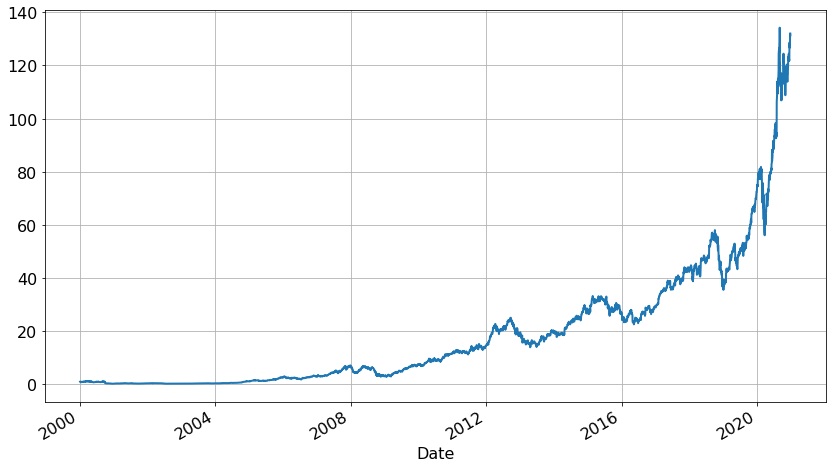

In [13]:
apple['Close'].plot()

In [14]:
apple.describe()

,Close,Open,High,Low,Volume,Change
count,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.000000
mean,18.641193,18.634180,18.832784,18.434053,4.460963e+08,0.001154
std,23.624084,23.609736,23.893131,23.328257,3.918763e+08,0.028063
min,0.230000,0.230000,0.240000,0.230000,3.947000e+07,-0.750700
25%,1.357500,1.350000,1.370000,1.337500,1.774525e+08,-0.009700
50%,9.165000,9.170000,9.270000,9.075000,3.330200e+08,0.000000
75%,27.555000,27.570000,27.907500,27.282500,5.936100e+08,0.013025
max,134.180000,137.590000,137.980000,131.100000,7.430000e+09,0.138900


In [64]:
df_price = pd.DataFrame()

df_change = pd.DataFrame()

for i, data in sp500.iterrows():
    sym, name = data['Symbol'], data['Name']
    csv_path = os.path.join(filepath, f"{sym}.csv")
    df = pd.read_csv(csv_path, parse_dates=True, index_col = ['Date'])
    df_price[sym] = df['Close']
    df_change[sym] = df['Change']
    

In [19]:
df_price.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,47.19,15.66,NaN,18.25,NaN,1.37,16.39,15.50,NaN,36.25,...,NaN,19.00,24.19,46.75,NaN,9.33,25.03,NaN,55.50,NaN
2000-01-04,45.31,15.22,NaN,17.81,NaN,1.33,15.02,14.62,NaN,34.81,...,NaN,19.44,23.06,45.69,NaN,9.14,24.67,NaN,52.81,NaN
2000-01-05,46.62,15.19,NaN,18.00,NaN,1.33,15.31,15.00,NaN,35.19,...,NaN,20.19,24.25,44.69,NaN,9.19,25.14,NaN,52.75,NaN
2000-01-06,50.38,15.72,NaN,18.03,NaN,1.31,15.44,16.00,NaN,35.47,...,NaN,20.00,23.75,40.81,NaN,9.11,23.78,NaN,53.50,NaN
2000-01-07,51.38,15.89,NaN,17.94,NaN,1.34,16.19,16.25,NaN,36.16,...,NaN,20.00,24.31,45.44,NaN,8.91,23.51,NaN,53.62,NaN


In [20]:
df_open.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,48.03,15.78,NaN,18.52,NaN,1.31,16.81,14.97,NaN,37.38,...,NaN,19.62,23.38,47.94,NaN,9.64,25.93,NaN,59.03,NaN
2000-01-04,46.44,15.41,NaN,18.50,NaN,1.34,15.75,15.12,NaN,35.94,...,NaN,19.06,24.19,45.56,NaN,9.25,25.03,NaN,54.62,NaN
2000-01-05,45.56,15.02,NaN,17.06,NaN,1.32,14.56,14.53,NaN,34.84,...,NaN,19.44,23.00,45.00,NaN,9.19,23.57,NaN,52.75,NaN
2000-01-06,47.16,15.22,NaN,17.62,NaN,1.32,15.36,15.50,NaN,35.31,...,NaN,20.12,23.56,43.88,NaN,9.12,24.82,NaN,52.75,NaN
2000-01-07,50.56,15.44,NaN,18.00,NaN,1.32,15.39,15.41,NaN,35.34,...,NaN,20.00,23.75,40.94,NaN,9.11,23.67,NaN,53.75,NaN


In [21]:
len(df_price)

5280

In [22]:
df_price.columns

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=505)

In [23]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data ,0)
    return numerator / (denominator + 1e-7)

In [24]:
df = min_max_scaler(apple['Close'])

<AxesSubplot:xlabel='Date'>

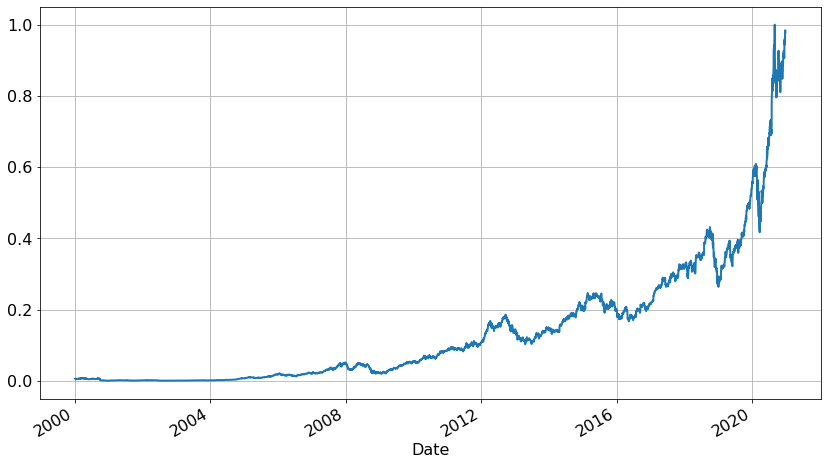

In [25]:
df.plot()

In [26]:
scaled_apple = pd.DataFrame()

In [27]:
scaled_apple['Close'] = min_max_scaler(apple['Close'])

In [28]:
scaled_apple['Change'] = min_max_scaler(apple['Change'])
scaled_apple['Volume'] = min_max_scaler(apple['Volume'])

In [29]:
scaled_apple

,Close,Change,Volume
Date,,,
2000-01-03,0.005748,0.941659,0.067160
2000-01-04,0.005151,0.753934,0.063901
2000-01-05,0.005226,0.856115,0.099973
2000-01-06,0.004629,0.747190,0.098573
2000-01-07,0.004927,0.896807,0.057000
...,...,...,...
2020-12-18,0.943785,0.825989,0.020712
2020-12-21,0.955580,0.857801,0.011066
2020-12-22,0.982829,0.875899,0.017574


<AxesSubplot:xlabel='Date'>

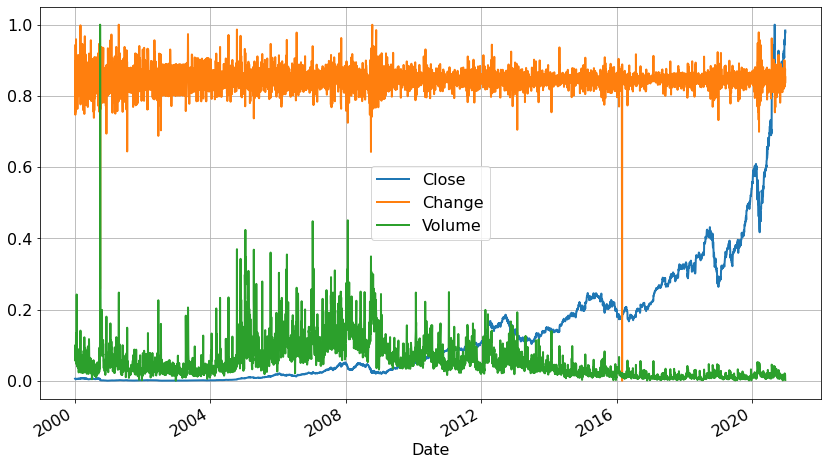

In [30]:
scaled_apple.plot()

### Data Scaling 후에 Training하는게 좋을듯  
    + 어떤 Scaler 쓸지 찾아보기

In [65]:
df_price.loc['2019-01']

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,190.95,69.50,89.23,309.96,140.59,47.03,224.57,18.83,157.92,14.18,...,104.40,48.22,20.13,86.85,66.51,91.44,156.24,102.28,41.58,84.48
2019-01-03,183.76,66.22,86.29,302.29,135.79,45.36,215.70,17.05,162.85,14.17,...,103.39,48.03,19.69,83.58,64.23,89.14,146.88,100.43,41.35,81.56
2019-01-04,191.32,68.11,89.07,313.44,141.07,47.17,226.19,19.00,158.81,14.64,...,107.56,48.50,20.45,87.45,66.94,91.46,152.97,103.86,42.62,84.76
2019-01-07,190.88,69.13,90.37,314.80,141.56,48.50,229.26,20.57,161.14,14.71,...,109.47,48.29,20.89,89.76,65.95,91.36,155.29,103.90,42.79,85.27
2019-01-08,191.68,68.30,90.79,318.42,145.14,49.97,232.68,20.75,160.02,15.05,...,112.90,48.85,21.58,88.05,66.57,91.18,156.33,101.57,43.18,86.54
2019-01-09,192.30,69.44,87.81,336.40,145.87,50.83,235.43,20.19,164.43,15.02,...,114.37,48.46,21.89,88.84,67.65,91.14,160.21,102.40,43.55,86.23
2019-01-10,193.60,69.08,88.20,335.13,147.02,51.35,237.77,19.74,165.07,15.34,...,111.40,49.27,22.15,90.37,68.91,91.79,160.35,103.72,43.76,85.90
2019-01-11,192.21,69.33,88.31,323.80,146.23,46.54,237.55,20.27,159.42,15.39,...,113.55,49.29,22.14,90.92,69.32,90.94,163.20,104.28,43.99,86.06
2019-01-14,192.17,68.27,84.76,315.25,144.93,47.29,234.56,20.23,158.72,15.04,...,108.10,48.93,22.30,90.56,69.16,90.00,163.61,102.69,44.32,84.50


In [54]:
df = df_price.pct_change()
df

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.039839,-0.028097,NaN,-0.024110,NaN,-0.029197,-0.083588,-0.056774,NaN,-0.039724,...,NaN,0.023158,-0.046714,-0.022674,NaN,-0.020364,-0.014383,NaN,-0.048468,NaN
2000-01-05,0.028912,-0.001971,NaN,0.010668,NaN,0.000000,0.019308,0.025992,NaN,0.010916,...,NaN,0.038580,0.051605,-0.021887,NaN,0.005470,0.019051,NaN,-0.001136,NaN
2000-01-06,0.080652,0.034891,NaN,0.001667,NaN,-0.015038,0.008491,0.066667,NaN,0.007957,...,NaN,-0.009411,-0.020619,-0.086820,NaN,-0.008705,-0.054097,NaN,0.014218,NaN
2000-01-07,0.019849,0.010814,NaN,-0.004992,NaN,0.022901,0.048575,0.015625,NaN,0.019453,...,NaN,0.000000,0.023579,0.113453,NaN,-0.021954,-0.011354,NaN,0.002243,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,-0.001302,0.001747,-0.004195,0.040427,0.006730,0.021592,0.015322,-0.009500,-0.002183,0.020371,...,0.009755,-0.013580,-0.011673,-0.017582,0.003008,0.009100,-0.006473,0.003237,-0.018868,0.005716
2020-12-21,-0.004308,-0.008076,-0.007085,0.008248,-0.018141,-0.017262,-0.009067,-0.028044,0.003125,0.003549,...,-0.029242,-0.010741,-0.020997,-0.026208,0.006697,-0.010475,0.007802,-0.021403,0.032863,-0.017051
2020-12-22,-0.005010,0.001758,-0.008774,0.022041,-0.007459,0.006869,0.011597,-0.000751,-0.006792,0.008842,...,0.000622,-0.008564,0.000000,-0.007709,-0.013106,-0.011323,0.010774,0.015007,-0.009192,0.006155


In [33]:
corr = df.corr()

In [34]:
corr.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
MMM,1.000000,0.397900,0.387058,0.244286,0.434897,0.277093,0.370060,0.280869,0.349357,0.289047,...,0.404549,0.287507,0.265221,0.366418,0.605838,0.418670,0.360333,0.413098,0.426201,0.412539
ABT,0.397900,1.000000,0.473368,0.212148,0.342141,0.213814,0.256932,0.190739,0.269507,0.191956,...,0.237398,0.303910,0.181157,0.221830,0.455654,0.324445,0.230275,0.403441,0.243320,0.545023
ABBV,0.387058,0.473368,1.000000,0.235147,0.389905,0.252600,0.360891,0.201725,0.260551,0.266802,...,0.258097,0.247175,0.152700,0.295148,0.342514,0.269433,0.297725,0.382050,0.294495,0.427460
ABMD,0.244286,0.212148,0.235147,1.000000,0.260207,0.199778,0.262122,0.195612,0.178949,0.163055,...,0.241065,0.128332,0.138047,0.248026,0.208049,0.168318,0.232231,0.232833,0.226768,0.275662
ACN,0.434897,0.342141,0.389905,0.260207,1.000000,0.333780,0.414450,0.315444,0.292144,0.306799,...,0.331909,0.261348,0.265093,0.405050,0.524580,0.324503,0.375593,0.334657,0.304078,0.515100


In [35]:
idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:20]

(GOOGL, GOOG)     0.993381
(FOXA, FOX)       0.988323
(NWSA, NWS)       0.979546
(UAA, UA)         0.971259
(DISCA, DISCK)    0.943751
(CFG, KEY)        0.906204
(CFG, RF)         0.900832
(CFG, FITB)       0.892175
(CFG, CMA)        0.883606
(AVB, EQR)        0.882857
(IR, TT)          0.882160
(HAL, SLB)        0.876687
(CFG, PNC)        0.873610
(CFG, TFC)        0.871114
(BXP, VNO)        0.867244
(CFG, HBAN)       0.863105
(FRT, REG)        0.860067
(KIM, REG)        0.858502
(AVB, ESS)        0.855792
(NCLH, RCL)       0.855399
dtype: float64

In [ ]:
idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

In [49]:
corr['MMM'].sort_values(ascending=False)

MMM     1.000000
ITW     0.664583
TROW    0.647843
AMCR    0.628041
FTV     0.622877
          ...   
TWTR    0.224030
ETSY    0.218203
MNST    0.185034
VNT     0.129735
NEM     0.118544
Name: MMM, Length: 505, dtype: float64

In [56]:
corr = df_change.corr()

In [57]:
idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:20]

(GOOGL, GOOG)     0.993374
(FOXA, FOX)       0.988386
(NWSA, NWS)       0.979564
(UAA, UA)         0.971279
(CFG, KEY)        0.906177
(CFG, RF)         0.900810
(CFG, FITB)       0.892176
(CFG, CMA)        0.883616
(AVB, EQR)        0.882832
(IR, TT)          0.882209
(DISCA, DISCK)    0.882065
(HAL, SLB)        0.875561
(CFG, PNC)        0.873543
(CFG, TFC)        0.871014
(BXP, VNO)        0.866950
(CFG, HBAN)       0.863121
(FRT, REG)        0.860057
(KIM, REG)        0.858517
(AVB, ESS)        0.855814
(EQR, UDR)        0.854261
dtype: float64

In [59]:
corr['AIG'].sort_values(ascending=False)[:20]

AIG     1.000000
CFG     0.706205
SYF     0.675347
HAL     0.644699
HWM     0.629867
AMCR    0.622310
FOX     0.618022
FOXA    0.592974
C       0.590872
TROW    0.589511
PSX     0.571824
CTVA    0.569559
FTV     0.566682
WRK     0.560599
APTV    0.557860
NCLH    0.553852
J       0.549535
LIN     0.542520
BAC     0.538889
FRC     0.538612
Name: AIG, dtype: float64